A8: Simple Matching Coefficient (SMC): 0.7741935483870968
A9: Cosine Similarity (COS): 0.9999999999999883


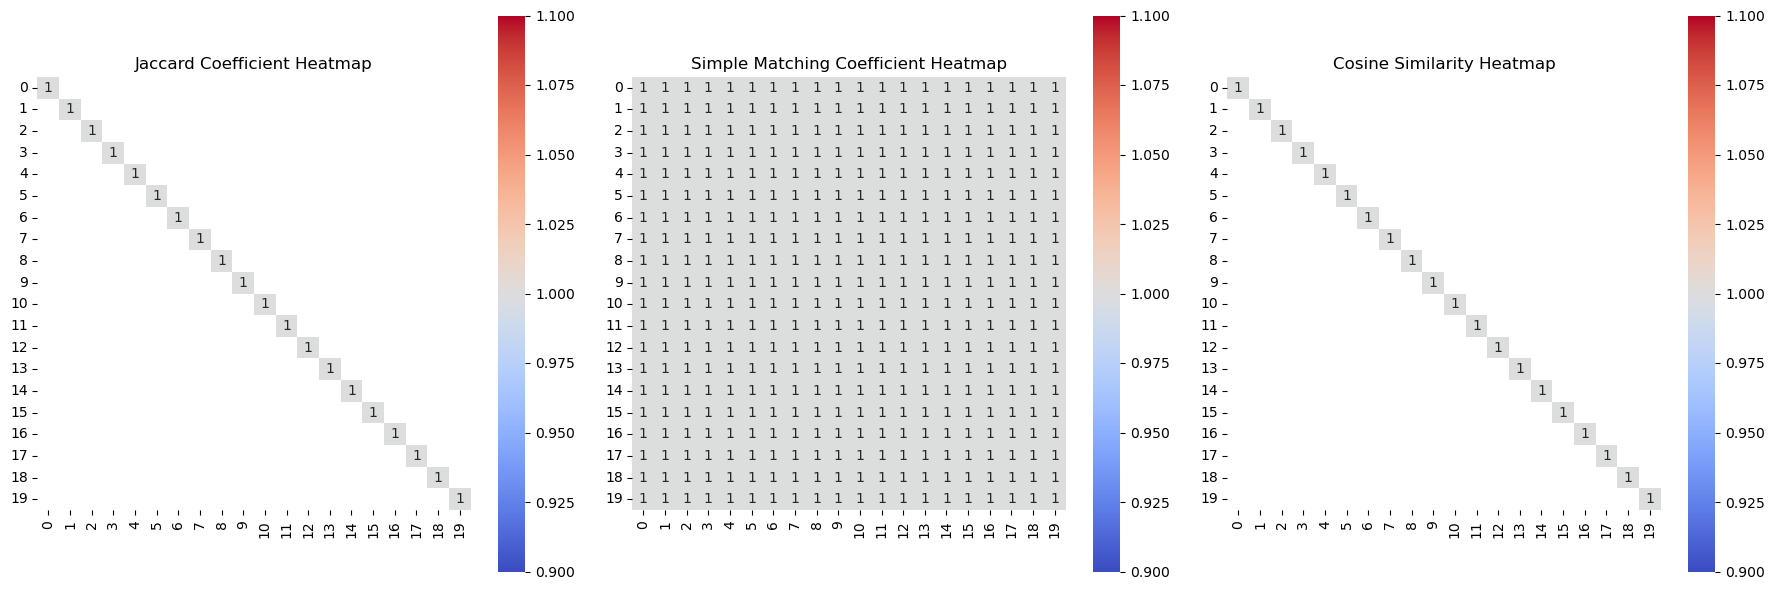

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def calculate_jc_smc_cos(data):
    # Initialize matrices to store similarity values
    num_vectors = len(data)
    jc_matrix = np.zeros((num_vectors, num_vectors))
    smc_matrix = np.zeros((num_vectors, num_vectors))
    cos_matrix = np.zeros((num_vectors, num_vectors))

    for i in range(num_vectors):
        for j in range(num_vectors):
            if i == j:
                # Diagonal elements, similarity with itself, assign 1
                jc_matrix[i][j] = 1.0
                smc_matrix[i][j] = 1.0
                cos_matrix[i][j] = 1.0
            else:
                # Binary vector calculation for JC and SMC
                binary_vector1 = data.iloc[i].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else np.nan)).fillna(0)
                binary_vector2 = data.iloc[j].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else np.nan)).fillna(0)

                # Calculate f11, f01, f10, f00
                f11 = np.sum((binary_vector1 == 1) & (binary_vector2 == 1))
                f01 = np.sum((binary_vector1 == 0) & (binary_vector2 == 1))
                f10 = np.sum((binary_vector1 == 1) & (binary_vector2 == 0))
                f00 = np.sum((binary_vector1 == 0) & (binary_vector2 == 0))
                
                # Jaccard Coefficient
                denominator_jc = f01 + f10 + f11
                jc_matrix[i][j] = f11 / denominator_jc if denominator_jc > 0 else np.nan

                # Simple Matching Coefficient
                smc_matrix[i][j] = (f11 + f00) / (f00 + f01 + f10 + f11)

                # Cosine Similarity
                try:
                    vector1 = np.array(data.iloc[i], dtype=float).reshape(1, -1)
                    vector2 = np.array(data.iloc[j], dtype=float).reshape(1, -1)
                    cos_matrix[i][j] = cosine_similarity(vector1, vector2)[0][0]
                except ValueError:
                    cos_matrix[i][j] = np.nan

    return jc_matrix, smc_matrix, cos_matrix

def task_a8_a9(thyroid_data):
    # Task A8: Calculate Simple Matching Coefficient (SMC)
    vector1 = thyroid_data.iloc[0]
    vector2 = thyroid_data.iloc[1]

    # Replace non-numeric values if any
    vector1 = vector1.replace({'F': 0, 'M': 1})
    vector2 = vector2.replace({'F': 0, 'M': 1})

    smc = np.sum(vector1 == vector2) / len(vector1)
    print(f"A8: Simple Matching Coefficient (SMC): {smc}")

    # Task A9: Calculate Cosine Similarity
    # Convert vectors to numeric
    vector1 = pd.to_numeric(vector1, errors='coerce').fillna(0).values.reshape(1, -1)
    vector2 = pd.to_numeric(vector2, errors='coerce').fillna(0).values.reshape(1, -1)
    
    cosine_sim = cosine_similarity(vector1, vector2)[0][0]
    print(f"A9: Cosine Similarity (COS): {cosine_sim}")


def plot_heatmaps(jc_matrix, smc_matrix, cos_matrix):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, ax=axs[0], annot=True, cmap='coolwarm', square=True)
    axs[0].set_title('Jaccard Coefficient Heatmap')

    sns.heatmap(smc_matrix, ax=axs[1], annot=True, cmap='coolwarm', square=True)
    axs[1].set_title('Simple Matching Coefficient Heatmap')

    sns.heatmap(cos_matrix, ax=axs[2], annot=True, cmap='coolwarm', square=True)
    axs[2].set_title('Cosine Similarity Heatmap')

    plt.tight_layout()
    plt.show()

def main():
    # Load the data
    file_path = r"C:\download\Lab Session Data.xlsx"
    thyroid_data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

    # Perform tasks A8 and A9
    task_a8_a9(thyroid_data)

    # Consider only the first 20 observation vectors for heatmap generation
    thyroid_data_subset = thyroid_data.head(20)

    # Calculate JC, SMC, and Cosine Similarity for the subset
    jc_matrix, smc_matrix, cos_matrix = calculate_jc_smc_cos(thyroid_data_subset)

    # Plot the heatmaps
    plot_heatmaps(jc_matrix, smc_matrix, cos_matrix)


if __name__ == "__main__":
    main()
 
